In [21]:
import numpy as np
import pandas as pd
import seaborn as sns


# Question 1

In [22]:
airpol_df = pd.read_csv('airpol.csv')
print(airpol_df)

    Wind  Solar Rad  CO  NO  NO2  O3  HC
0      8         98   7   2   12   8   2
1      7        107   4   3    9   5   3
2      7        103   4   3    5   6   3
3     10         88   5   2    8  15   4
4      6         91   4   2    8  10   3
5      8         90   5   2   12  12   4
6      9         84   7   4   12  15   5
7      5         72   6   4   21  14   4
8      7         82   5   1   11  11   3
9      8         64   5   2   13   9   4
10     6         71   5   4   10   3   3
11     6         91   4   2   12   7   3
12     7         72   7   4   18  10   3
13    10         70   4   2   11   7   3
14    10         72   4   1    8  10   3
15     9         77   4   1    9  10   3
16     8         76   4   1    7   7   3
17     8         71   5   3   16   4   4
18     9         67   4   2   13   2   3
19     9         69   3   3    9   5   3
20    10         62   5   3   14   4   4
21     9         88   4   2    7   6   3
22     8         80   4   2   13  11   4
23     5        

In [23]:
# Determine continuous vs. non-continuous variables
# Select numeric columns
numeric_cols = airpol_df.select_dtypes(include=[np.number]).columns.tolist()

# Define a threshold for “continuous” (e.g. more than 10 distinct values)
threshold = 10
continuous_vars = [col for col in numeric_cols 
                   if airpol_df[col].nunique() > threshold]

# Everything else is treated as non-continuous
non_continuous_vars = [col for col in airpol_df.columns 
                       if col not in continuous_vars]

print("Continuous variables:", continuous_vars)
print("Non-continuous variables:", non_continuous_vars)

Continuous variables: ['Solar Rad', 'NO2', 'O3']
Non-continuous variables: ['Wind', 'CO', 'NO', 'HC']


(Used AI to generate the markdown formula below)

### Covariance and variance formula 

# Sample Covariance and Variance Formulas

**Sample Covariance between X and Y:**

$$
\text{Cov}(X,Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n-1}
$$

**Sample Variance of X:**

$$
\text{Var}(X) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}
$$

In [24]:
# extract the two variables: NO2 and Solar Rad
no2 = airpol_df['NO2']
solar_rad = airpol_df['Solar Rad']

# calculate the means
mean_no2 = no2.mean()
mean_solar = solar_rad.mean()

# compute the covariance numerator by summing over the product of deviations
numerator = ((no2 - mean_no2) * (solar_rad - mean_solar)).sum()

# for sample covariance, divide by (n - 1)
n = len(no2)
covariance = numerator / (n - 1)

print("Covariance:", covariance)

# Compute sample variances using first principles
var_no2 = ((no2 - mean_no2) ** 2).sum() / (n - 1)
var_solar = ((solar_rad - mean_solar) ** 2).sum() / (n - 1)

print("variance for NO2:", var_no2)
print("variance for solar rad:", var_solar)

cov_var_matrix = np.array([[var_no2, covariance],
                           [covariance, var_solar]])
print("Covariance-Variance Matrix:")
print(cov_var_matrix)

# now get the correlation between the 2 variables using first principles
std_no2 = np.sqrt(var_no2)  # standard deviation of NO2
std_solar = np.sqrt(var_solar)  # standard deviation of solar rad
correlation = covariance / (std_no2 * std_solar)
print("Correlation:", correlation)

# compute the correlation matrix 
correlation_matrix = np.array([[1, correlation],
                               [correlation, 1]])
print("Correlation Matrix:")
print(correlation_matrix)


Covariance: 6.763066202090593
variance for NO2: 11.363530778164925
variance for solar rad: 300.51567944250877
Covariance-Variance Matrix:
[[ 11.36353078   6.7630662 ]
 [  6.7630662  300.51567944]]
Correlation: 0.11573199090089906
Correlation Matrix:
[[1.         0.11573199]
 [0.11573199 1.        ]]


In [25]:
#pip install matplotlib

## I am led to believe that in this question we are more interested in the relationship between the variables and we are expressing this relationship in terms of vectors, hence we will employ the use of the correlation.

We start by centering the variables:

$$
x = \text{NO2} - \text{mean\_NO2} \quad \text{and} \quad y = \text{solar\_rad} - \text{mean\_solar}
$$

The dot product of the centered variables gives the covariance (up to the normalization factor):

$$
\text{covariance} = \frac{x^T y}{n-1}
$$

Thus, the correlation can be written as:

$$
\text{correlation} = \frac{x^T y}{(n-1)\,\text{std\_NO2}\,\text{std\_solar}}
$$

Alternatively, if we form the matrix \( A \) with the centered variables as columns,

$$
A = \begin{bmatrix} x & y \end{bmatrix},
$$

then the covariance matrix is

$$
\text{Cov} = \frac{A^T A}{n-1},
$$

and the off-diagonal element of \(\text{Cov}\) is exactly \(\frac{x^T y}{n-1}\). Therefore, the correlation is

$$
\text{correlation} = \frac{\text{Cov}[0,1]}{\text{std\_NO2}\,\text{std\_solar}}.
$$

## Using Correlation to Find the Angle Between Vectors

In our analysis, remember that the correlation between the centered variables (NO2 and solar radiation) is defined as the cosine of the angle between their corresponding vectors:

$$
\cos(\theta) = \text{correlation}
$$

This means if we know the correlation value, we can recover the angle between the two vectors by computing the arccosine. For example, in Python using NumPy, you can compute the angle (in radians) as:

$$
\theta = \arccos(\text{correlation})
$$

To convert this angle to degrees, use:

$$
\theta_{degrees} = \theta \times \frac{180}{\pi}
$$

Thus, the correlation not only tells us about the strength of the linear relationship but also directly informs us of the geometric angle between the centered variable vectors.

(explanation from AI on why we use the notation of Cov(0,1))


The notation **[0,1]** in the covariance matrix is used to refer to the position of the element representing the covariance between the two variables. In a 2x2 covariance matrix, the indices are zero-based, meaning:

- **0** represents the first variable (e.g., wind).
- **1** represents the second variable (e.g., solar radiation).

Thus, **Cov[0,1]** is the element in the first row and second column of the matrix, which holds the covariance between these two variables. This convention is common in programming and mathematical notation when dealing with arrays or matrices.

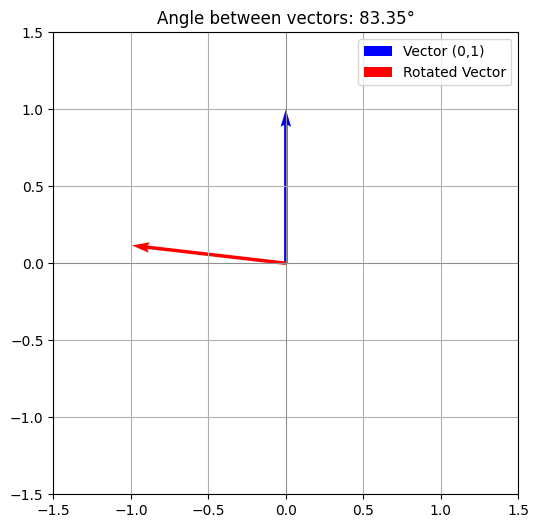

Correlation: 0.11573199090089906
Angle (radians): 1.454804415891728
Angle (degrees): 83.35415304759096


In [26]:
# Plotting an arbitrary vector and its rotated counterpart using correlation-derived angle
import numpy as np
import matplotlib.pyplot as plt

# Use existing correlation if defined; otherwise, use an arbitrary value

corr = correlation


# Calculate angle (in radians) from the correlation (assuming correlation = cos(theta))
theta = np.arccos(corr)
theta_deg = np.degrees(theta)

# Define the arbitrary vector (0,1)
vec1 = np.array([0, 1])

# Compute the rotated vector by applying a rotation matrix to vec1
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                              [np.sin(theta),  np.cos(theta)]])
vec2 = rotation_matrix.dot(vec1)

# Plot the vectors starting from the origin
plt.figure(figsize=(6,6))
plt.quiver(0, 0, vec1[0], vec1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector (0,1)')
plt.quiver(0, 0, vec2[0], vec2[1], angles='xy', scale_units='xy', scale=1, color='red', label='Rotated Vector')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.legend()
plt.title(f'Angle between vectors: {theta_deg:.2f}°')
plt.grid(True)
plt.show()

print('Correlation:', corr)
print('Angle (radians):', theta)
print('Angle (degrees):', theta_deg)

## Insight Questions

When analyzing data, centering the variables (i.e., subtracting the mean) lets us focus on the essential relationship between them. Consider two centered variables, \( x \) and \( y \). Their covariance is given by

$$
\text{Cov}(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} x_i\,y_i = \frac{x^T y}{n-1}.
$$

We can summarize the variances and covariance in matrix form as follows:

$$
\mathbf{Cov} =
\begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y) \\\\
\text{Cov}(x, y) & \text{Var}(y)
\end{bmatrix},
$$

where the variances are defined by

$$
\text{Var}(x) = \frac{\sum_{i=1}^{n} x_i^2}{n-1} \quad \text{and} \quad \text{Var}(y) = \frac{\sum_{i=1}^{n} y_i^2}{n-1}.
$$

The correlation between \( x \) and \( y \) is obtained by normalizing the covariance with the corresponding standard deviations:

$$
\text{Correlation} = \frac{\text{Cov}(x, y)}{\sigma_x\, \sigma_y},
$$

which is equivalent to expressing the correlation as the cosine of the angle between the vectors:

$$
\cos(\theta) = \frac{\text{Cov}(x, y)}{\sigma_x\, \sigma_y}.
$$

Thus, if the covariance is zero

$$
\text{Cov}(x, y) = 0,
$$

then

$$
\text{Correlation} = 0 \quad \text{and} \quad \cos(\theta) = 0,
$$

indicating that the centered variables (or vectors) are orthogonal. Orthogonality in this context implies that there is no linear relationship between the variables, often taken as a sign of independence.

# Question 2

In [27]:
# 1. Subset only the continuous variables
cont_df = airpol_df[continuous_vars]

# 2. Convert to NumPy array and get sample size
X = cont_df.to_numpy()
n = X.shape[0]

# 3. Center each column (variable) by subtracting its mean
means = X.mean(axis=0)
Xc = X - means

# 4. Manually compute the p×p covariance matrix Σ
p = Xc.shape[1]
Sigma = np.zeros((p, p))
for i in range(p):
    for j in range(p):
        # dot product of centered columns i and j, divided by (n−1)
        Sigma[i, j] = (Xc[:, i] * Xc[:, j]).sum() / (n - 1)

# 5. Display with variable names
Sigma_df = pd.DataFrame(Sigma, index=continuous_vars, columns=continuous_vars)
print("Sample covariance matrix Σ:")
print(Sigma_df)

Sample covariance matrix Σ:
            Solar Rad        NO2         O3
Solar Rad  300.515679   6.763066  30.790941
NO2          6.763066  11.363531   3.126597
O3          30.790941   3.126597  30.978513


In [28]:
# Check symmetry and compute eigenvalues from first principles
def check_matrix_properties(A):
    n = len(A)
    
    # Check symmetry
    is_symmetric = True
    for i in range(n):
        for j in range(n):
            if abs(A[i,j] - A[j,i]) > 1e-10:
                is_symmetric = False
                break
    
    # Power iteration method to find eigenvalues
    def power_iteration(A, num_iterations=1000, tolerance=1e-10):
        n = len(A)
        v = np.random.rand(n)
        v = v / np.linalg.norm(v)
        
        for _ in range(num_iterations):
            Av = A @ v
            v_new = Av / np.linalg.norm(Av)
            
            # Check convergence
            if np.allclose(abs(v), abs(v_new), rtol=tolerance):
                break
                
            v = v_new
            
        eigenvalue = (v @ (A @ v)) / (v @ v)
        return eigenvalue, v
    
    # Find all eigenvalues using deflation
    eigenvalues = []
    A_remaining = A.copy()
    
    for i in range(n):
        eigenvalue, eigenvector = power_iteration(A_remaining)
        eigenvalues.append(eigenvalue)
        
        # Deflate the matrix
        if i < n-1:  # No need to deflate on last iteration
            v = eigenvector.reshape(-1, 1)
            A_remaining = A_remaining - eigenvalue * (v @ v.T)
    
    eigenvalues = np.array(eigenvalues)
    
    # Check positive definiteness
    is_positive_definite = all(eigenvalues > 0)
    
    return {
        'is_symmetric': is_symmetric,
        'eigenvalues': eigenvalues,
        'is_positive_definite': is_positive_definite,
        'min_eigenvalue': min(eigenvalues)
    }

# Apply the check to our covariance matrix
results = check_matrix_properties(Sigma_df.to_numpy())

print(f"Is Sigma symmetric? {results['is_symmetric']}")
print(f"\nEigenvalues: {results['eigenvalues']}")
print(f"Is Sigma positive definite? {results['is_positive_definite']}")
print(f"Minimum eigenvalue: {results['min_eigenvalue']}")

Is Sigma symmetric? True

Eigenvalues: [304.1591513   27.83710269  10.86146959]
Is Sigma positive definite? True
Minimum eigenvalue: 10.861469588968424


# Question 3


In [29]:


# Define the matrix A
A = np.array([[13, -4, 2],
              [-4, 13, -2],
              [2, -2, 10]])

# Compute eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eigh(A)

print("Eigenvalues:")
print(eigvals)
print("\nNormalized Eigenvectors (columns):")
print(eigvecs)

# Spectral decomposition: A = P D P^T
P = eigvecs
D = np.diag(eigvals)
PT = P.T
A_reconstructed = P @ D @ PT

print("\nSpectral Decomposition (A reconstructed):")
print(A_reconstructed)

# Check if A_reconstructed is close to A
diff=A - A_reconstructed
print("\nDifference between original and reconstructed A (should be close to zero):")
print(diff)



Eigenvalues:
[ 9.  9. 18.]

Normalized Eigenvectors (columns):
[[-0.74535599  0.          0.66666667]
 [-0.59628479  0.4472136  -0.66666667]
 [ 0.2981424   0.89442719  0.33333333]]

Spectral Decomposition (A reconstructed):
[[13. -4.  2.]
 [-4. 13. -2.]
 [ 2. -2. 10.]]

Difference between original and reconstructed A (should be close to zero):
[[-1.77635684e-15  8.88178420e-16 -4.44089210e-16]
 [ 1.77635684e-15  1.77635684e-15 -2.22044605e-16]
 [-4.44089210e-16 -2.22044605e-16  0.00000000e+00]]


## Eigenvalues, Eigenvectors, and Spectral Decomposition

Given the matrix:

$$
A = \begin{bmatrix} 13 & -4 & 2 \\ -4 & 13 & -2 \\ 2 & -2 & 10 \end{bmatrix}
$$

We compute its **eigenvalues** and **normalized eigenvectors**. The spectral decomposition expresses $A$ as:

$$
A = P D P^T
$$

where:
- $P$ is the matrix whose columns are the normalized eigenvectors of $A$,
- $D$ is a diagonal matrix with the eigenvalues of $A$ on the diagonal,
- $P^T$ is the transpose of $P$.

### Why are eigenvalues and eigenvectors important?

- **Simplifying Computations:**
  - Diagonalizing a matrix (writing it as $A = P D P^T$) makes many computations much easier. For example, raising $A$ to a power, computing exponentials, or solving systems involving $A$ become straightforward when $A$ is diagonalized.
  - In the diagonal form, the action of $A$ on its eigenvectors is simply scaling by the corresponding eigenvalue.

- **Geometric Insight:**
  - The eigenvectors of $A$ point in the directions where the transformation $A$ acts as a simple scaling (no rotation).
  - The eigenvalues tell us how much $A$ stretches or shrinks along each eigenvector direction.

- **Applications:**
  - In data analysis (e.g., PCA), the eigenvectors of the covariance matrix indicate directions of maximum variance.

**In summary:**
> Eigenvalues and eigenvectors provide a powerful way to understand and simplify the action of a matrix, making complex computations more tractable and revealing the fundamental structure of linear transformations.

# Question 4


## Theoretical Derivation of $\mathbb{E}(AX)$ and $\mathrm{Cov}(AX)$

Let $X$ be a random vector in $\mathbb{R}^n$ with mean $\mu_X = \mathbb{E}[X]$ and covariance matrix $\Sigma_X = \mathrm{Cov}(X)$. Let $A$ be a $k \times n$ matrix.

**1. Expectation of a Linear Transformation:**

$$
\mathbb{E}[AX] = A\,\mathbb{E}[X] = A\mu_X
$$

This follows from the linearity of expectation.

**2. Covariance of a Linear Transformation:**

$$
\mathrm{Cov}(AX) = \mathbb{E}\big[(AX - \mathbb{E}[AX])(AX - \mathbb{E}[AX])^T\big]
$$

Expanding the terms:

$$
= \mathbb{E}\big[A(X - \mu_X)(X - \mu_X)^T A^T\big]
$$

Since $A$ is constant, it can be factored out:

$$
= A\,\mathbb{E}\big[(X - \mu_X)(X - \mu_X)^T\big]A^T
$$

But $\mathbb{E}\big[(X - \mu_X)(X - \mu_X)^T\big] = \Sigma_X$, so:

$$
\mathrm{Cov}(AX) = A\Sigma_X A^T
$$

Thus, the mean and covariance of the transformed vector $AX$ are given by:

- $\mathbb{E}[AX] = A\mu_X$
- $\mathrm{Cov}(AX) = A\Sigma_X A^T$

In [30]:
# Compute E[AX] and Cov(AX) using the formulas from the derivation



#(3x4)
A = np.array([[1, -1,0,0],
              [1, 1,-2,0],
              [1,1,1,3]])

# Compute mean vector mu_X (4x1)
mu_X = np.array([3,2,-2,0])

# Compute covariance matrix Sigma_X
Sigma_X = np.array([[3,0,0,0],
                   [0,3,0,0],
                   [0,0,3,0],
                   [0,0,0,3]]
                   )

# Compute E[AX]
E_AX = A @ mu_X
print("E[AX]:", E_AX)

# Compute Cov(AX)
Cov_AX = A @ Sigma_X @ A.T
print("Cov(AX):\n", Cov_AX)

E[AX]: [1 9 3]
Cov(AX):
 [[ 6  0  0]
 [ 0 18  0]
 [ 0  0 36]]


## The off-diagonals are all 0, indicating that all variables are uncorrelated since they have a covariance = 0.


## Insight questions


## Linear Combinations in Factor Analysis

In factor analysis, linear combinations of the original variables are used to create new variables called factors. These factors are constructed to capture most of the variance in the data using fewer variables than the original set. This process reduces the dimensionality of the data, making it easier to analyze and interpret.

By representing the data with a smaller number of factors, we achieve computational efficiency and simplify complex datasets. The main goal is to explain the observed correlations among variables with as few factors as possible, thus reducing redundancy and focusing on the underlying structure of the data.

Additionally, factor analysis helps to isolate the most important information in the dataset by identifying the key underlying factors that drive the observed patterns. This allows analysts to focus on the most significant sources of variation and ignore less relevant details.

### What does it imply if a transformed variable has zero variance?


**Implications:**
- The variable contains no information about differences between observations.

- In practical terms, such a variable cannot help distinguish or explain variation in the data and is often uninformative.

**Example:**
If $Y = a^T X$ is a linear combination of variables $X$ and $\mathrm{Var}(Y) = 0$, then $Y$ is constant for all samples of $X$.